In [ ]:
#Langauge: Python 
#Author: Roy Kalu
#Course: COSC 499 - Senior Project Spring 2025
#Date Completed: April 7th, 2025
#Description: 
#This project predicts United States GDP using historical yearly data from 2000 to 2003.
#It uses lag-based linear regression to forecast future GDP values.
#Input: GDP data from FRED (CSV format).
#Output: Forecasted GDP values, printed and visualized with matplotlib.

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [67]:
#Loading the GDP dataset
gdp = pd.read_csv("GDP.csv") 

#Ensuring the observation date is in datetime format
gdp['observation_date'] = pd.to_datetime(gdp['observation_date'])

# Set 'observation_date' as the index
gdp.set_index('observation_date', inplace=True)

#Resampling the data to yearly frequency (using mean for each year)
gdp_yearly = gdp.resample('YE').mean()

#Filtering the data for the years 2000 to 2023
gdp_yearly = gdp_yearly.loc['2000-01-01':'2023-12-31']


In [70]:
# Prepare features and target variable
# Using GDP of the previous year as feature
X = gdp_yearly[['GDP_lag1']]  
# Target variable is current year's GDP
y = gdp_yearly['GDP']  

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [72]:
#Predicting the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = model.score(X_test, y_test)

# Print performance metrics
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.9804686231838644
Mean Absolute Error (MAE): 321.99457686364076
Mean Squared Error (MSE): 242540.6054189995
Root Mean Squared Error (RMSE): 492.4841169205353


In [75]:
# Create a DataFrame for future years (2024 to 2028)
future_years = pd.DataFrame({
    'GDP_lag1': gdp_yearly['GDP'].iloc[-5:].values  # Last 5 years' GDP values
})

# Predict GDP for the next 5 years. starting from 2024
future_predictions = model.predict(future_years)

forecast_years = pd.date_range(start='2024', periods=5, freq='YE')

# Create DataFrame of predicted results
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Predicted GDP': future_predictions
})

# Show predictions
print(forecast_df)


        Year  Predicted GDP
0 2024-12-31   22786.373464
1 2025-12-31   22585.397817
2 2026-12-31   25101.492999
3 2027-12-31   27616.134735
4 2028-12-31   29469.166276


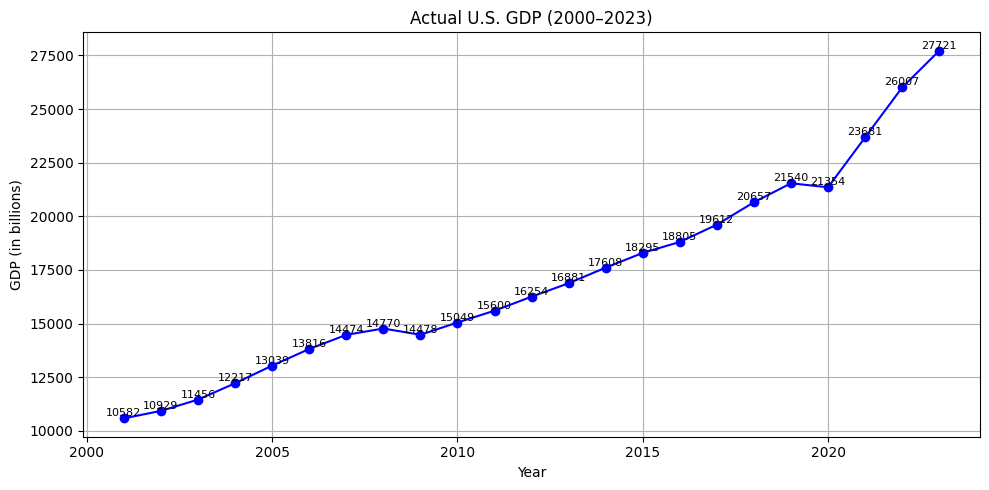

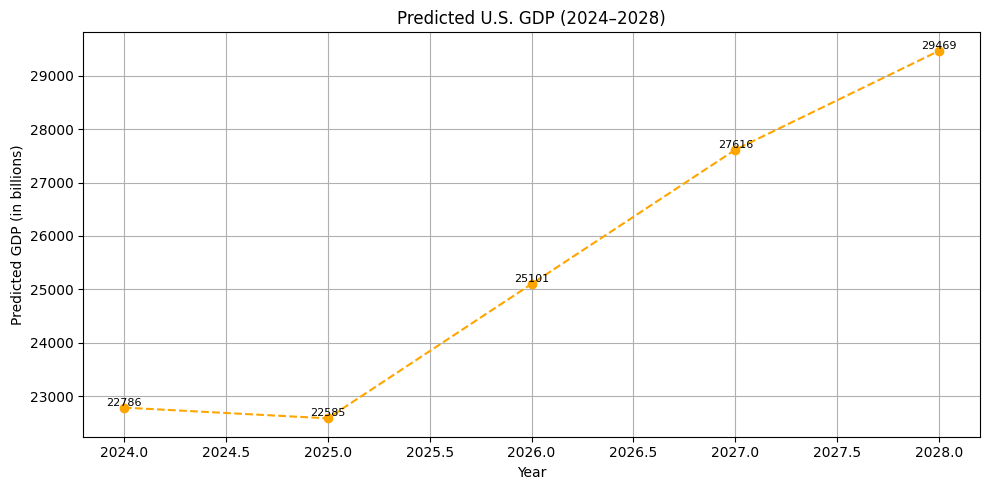

In [76]:
import matplotlib.pyplot as plt

#Graph of Actual U.S. GDP (2000–2023)
plt.figure(figsize=(10, 5))
plt.plot(gdp_yearly.index.year, gdp_yearly['GDP'], marker='o', color='blue')
plt.title('Actual U.S. GDP (2000–2023)')
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.grid(True)

#Adding GDP values on each point
for x, y in zip(gdp_yearly.index.year, gdp_yearly['GDP']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#Graph of Predicted U.S. GDP (2024–2028) ---
plt.figure(figsize=(10, 5))
plt.plot(forecast_df['Year'].dt.year, forecast_df['Predicted GDP'], marker='o', color='orange', linestyle='--')
plt.title('Predicted U.S. GDP (2024–2028)')
plt.xlabel('Year')
plt.ylabel('Predicted GDP (in billions)')
plt.grid(True)

#Adding predicted GDP values on each point
for x, y in zip(forecast_df['Year'].dt.year, forecast_df['Predicted GDP']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
